<a href="https://colab.research.google.com/github/SilverFoxMedia-Tesis/IA_01/blob/main/Algoritmo_de_Regresi%C3%B3n_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

estadoxvalores = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 0,
    "Overweight_Level_I": -1,
    "Overweight_Level_II": -2,
    "Obesity_Type_I": -3,
    "Obesity_Type_II": -4,
    "Obesity_Type_III": -5,
}
FAFxvalores = {
    3 : 1,
    2 : 0,
    1 : -1,
    0 : -2,
}
TUExvalores = {
    0 : 0,
    1 : -1,
    2 : -2,
}
MTRANSxvalores = {
    "Bike": 2,
    "Walking": 1,
    "Public_Transportation": 0,
    "Motorbike": -1,
    "Automobile": -2,
}

In [11]:
#Lectura de datos
train = pd.read_csv('/ObesityDataSet_raw_and_data_sinthetic.csv')
test = pd.read_csv('/ObesityDataSet_raw_and_data_sinthetic.csv')

In [12]:
#Asigna pesos a las variables y crea nuevas columnas
train['Puntos_Nivel'] = train['MTRANS'].map(MTRANSxvalores) + train['NObeyesdad'].map(estadoxvalores) + train['TUE'].apply(lambda x: TUExvalores.get(int(x), 0)) + train['FAF'].apply(lambda x: FAFxvalores.get(int(x), 2))

def encontrar_nivel(puntos_nivel):
    if -11 <= puntos_nivel <= -7:
        return "Beginner"
    elif -6 <= puntos_nivel <= -2:
        return "Intermediate"
    elif -1 <= puntos_nivel <= 3:
        return "Expert"
    else:
        return "Desconocido"

train['Nivel'] = train['Puntos_Nivel'].apply(encontrar_nivel)

In [13]:
# Selección de columnas relevantes (tanto numéricas como categóricas)
columnas_numericas = ['TUE', 'FAF']
columnas_categoricas = ['MTRANS', 'NObeyesdad']

In [24]:
# Codificación one-hot para las columnas categóricas
train_encoded = pd.get_dummies(train[columnas_categoricas], columns=columnas_categoricas)

In [25]:
# Convertir FAF y TUE en enteros
train['FAF'] = train['FAF'].astype(int)
train['TUE'] = train['TUE'].astype(int)

In [26]:
# Concatenar las columnas numéricas y categóricas codificadas
X_train = pd.concat([train_encoded, train[columnas_numericas]], axis=1)

In [27]:
# Variable objetivo
y = train['Puntos_Nivel']

In [28]:
# Seleccionar un subconjunto de 500 filas
train_subset = X_train.sample(n=500, random_state=42)
y_subset = y[train_subset.index]

In [29]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train_subset, y_subset, test_size=0.2, random_state=42)

In [30]:
# Creación del modelo de regresión polinómica
degree = 2  # Grado del polinomio
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [31]:
# Entrenamiento del modelo
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [32]:
# Predicciones en los datos de prueba
y_pred = polyreg.predict(X_test)

In [36]:
# Evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.8258185651340318e-29


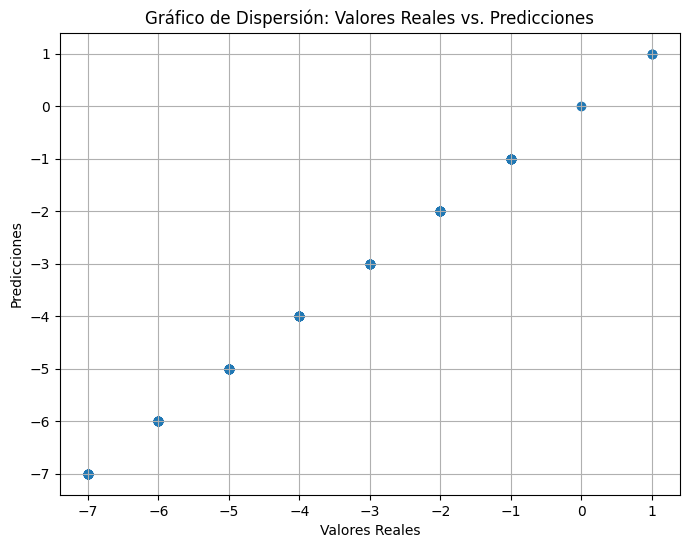

In [34]:
# Gráfico de dispersión para comparar predicciones con valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión: Valores Reales vs. Predicciones")
plt.grid(True)
plt.show()